In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Prediction_data.xlsx"


# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

Confusion Matrix:
[[783  64]
 [129 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.64      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202



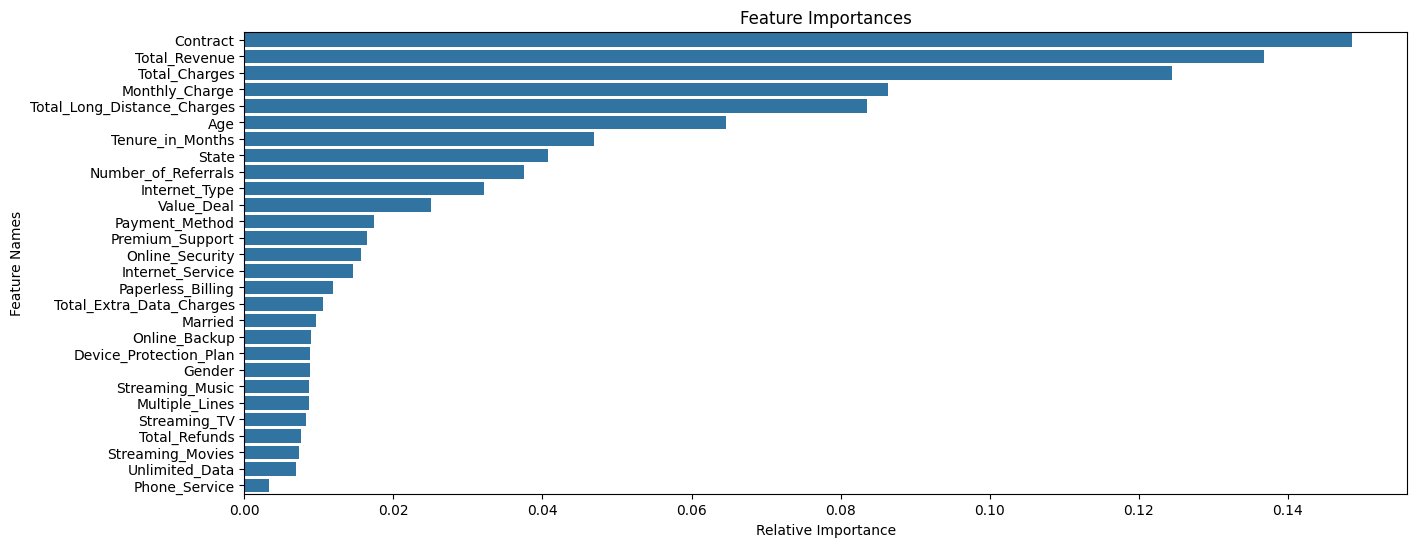

Churned customer predictions saved to 'Predicted_data_Output.xlsx'.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Prediction_data.xlsx"


# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')

 

# Display the first few rows of the fetched data


# Drop columns that won't be used for prediction
data.columns = data.columns.str.strip()
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

# Define the path to the Joiner Data Excel file
file_path = r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Prediction_data.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')


# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results
churned_customers.to_excel(r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Predicted_data_Output.xlsx", index=False, engine='openpyxl')
print("Churned customer predictions saved to 'Predicted_data_Output.xlsx'.")



Training with seed=0

Results for seed=0
Confusion Matrix:
 [[779  68]
 [126 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.77      0.65      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.83      0.84      0.83      1202

Precision: 0.7710

Training with seed=42

Results for seed=42
Confusion Matrix:
 [[783  64]
 [129 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.64      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202

Precision: 0.7793

Training with seed=100

Results for seed=100
Confusion Matrix:
 [[779  68]
 [125 230]]
Clas

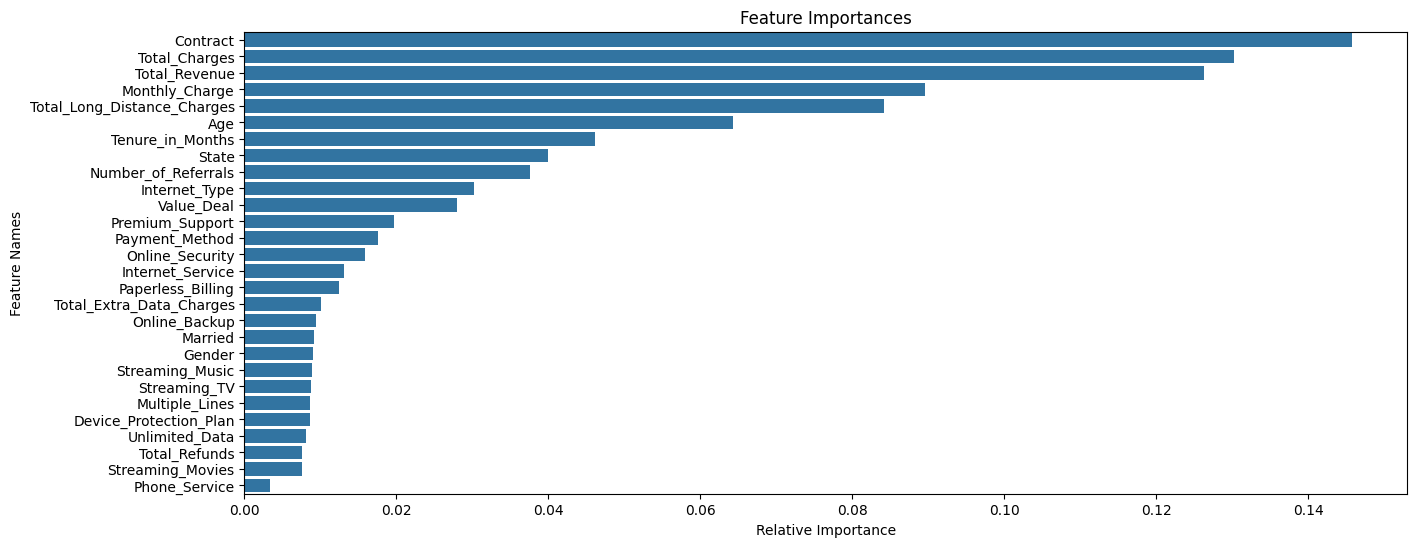

Churned customer predictions saved to 'Predicted_data_Output.xlsx'.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')

# Preprocessing
# Drop columns that won't be used for prediction
data.columns = data.columns.str.strip()
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the training and evaluation function
# Initialize the Random Forest Classifier
def train_and_evaluate(X_train, X_test, y_train, y_test, n_estimators=150, random_state=42):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"\nResults for seed={random_state}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")

    return model, precision

# Train multiple models with different seeds
seeds = [0, 42, 100, 200, 300,600,1200]
precisions = []
models = []

for seed in seeds:
    print(f"\nTraining with seed={seed}")
    model, prec = train_and_evaluate(X_train, X_test, y_train, y_test, random_state=seed)
    precisions.append(prec)
    models.append(model)

best_index = precisions.index(max(precisions))
best_model = models[best_index]
print(f"\nBest model precision: {precisions[best_index]:.4f} with seed={seeds[best_index]}")

# Feature Selection using Feature Importance
# Feature importance plotting
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Read new data for prediction
sheet_name_new = 'vw_JoinData'
new_data = pd.read_excel(file_path, sheet_name=sheet_name_new, engine='openpyxl')

original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical columns in new data using saved encoders
for col in new_data.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        new_data[col] = label_encoders[col].transform(new_data[col])
    else:
        print(f"Warning: Column '{col}' not found in label encoders.")

# Predict with best model
new_predictions = best_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

# Filter customers predicted as churned
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save output file
churned_customers.to_excel(r"D:\DA projects\Telecom_Churn_Dashboard_using ML\Predicted_data_Output.xlsx", index=False, engine='openpyxl')
print("Churned customer predictions saved to 'Predicted_data_Output.xlsx'.")
